# PROBLEMA
Se nos pide en este apartado resolver un problema de series temporales, realizando preprocesamiento y preparación de los mismos para crear visualizaciones y predicciones de los nacimientos en España entre 2016 y 2021.

# Lectura de datos
Leemos los datos y obserbamos su estructura.

In [91]:
import pandas as pd
import numpy as np

X = pd.read_csv("nacimientos_2016_2021.csv", sep=",")
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PROI    7488 non-null   int64
 1   SEXO    7488 non-null   int64
 2   MESPAR  7488 non-null   int64
 3   ANOPAR  7488 non-null   int64
 4   count   7488 non-null   int64
dtypes: int64(5)
memory usage: 292.6 KB


,PROI,SEXO,MESPAR,ANOPAR,count
0,1,1,1,2021,98
1,1,1,2,2021,92
2,1,1,3,2021,108
3,1,1,4,2021,99
4,1,1,5,2021,90


# Preproceso y visualización
En la información previa podemos ver que la fecha se da en dos columnas diferentes, esto hace dificil el analisis y la visualización por lo que pasamos los datos de "MESPAR" y "ANOPAR" a una nueva columna "AMPAR".

In [92]:
X['AMPAR'] = pd.to_datetime(X['ANOPAR'].astype(str) + X['MESPAR'].astype(str), format='%Y%m')
X.head()

,PROI,SEXO,MESPAR,ANOPAR,count,AMPAR
0,1,1,1,2021,98,2021-01-01
1,1,1,2,2021,92,2021-02-01
2,1,1,3,2021,108,2021-03-01
3,1,1,4,2021,99,2021-04-01
4,1,1,5,2021,90,2021-05-01


Una vez creada la columna "AMPAR", "MESPAR" y "ANOPAR" son superfluas por lo que las eliminamos.

In [93]:
del X['MESPAR']
del X['ANOPAR']

Realizamos ahora una visualización preliminar de los datos de nacimientos en la provincia 1 para varones y mujeres.

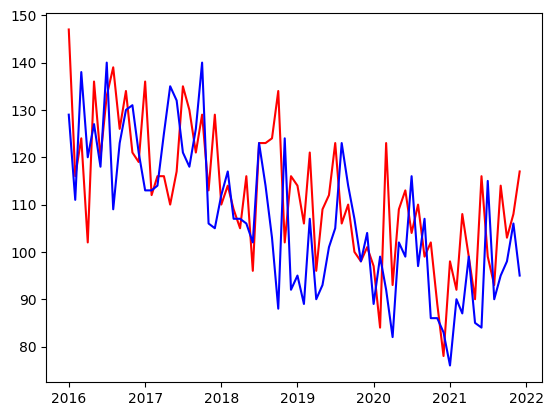

In [94]:
import matplotlib.pyplot as plt

X_1 = X[X["PROI"]==1] #Seleccionamos la primera provincia

X_c = X_1.sort_values(by=["AMPAR"], ascending = True) #Cambiamos el orden de los datos para que la columna empiece por la más antigua

X_c_v = X_c[X_c["SEXO"]==1] #Seleccionamos varones
X_c_m = X_c[X_c["SEXO"]==6] #Seleccionamos mujeres

plt.plot(X_c_v["AMPAR"], X_c_v["count"], color='red') #Representamos varones en rojo
plt.plot(X_c_m["AMPAR"], X_c_m["count"], color='blue') #Representamos mujeres en azul
plt.show()

En el grafico podemos observar una tendencia general descendente así como estacionalidad en cada año. Visualizamos ahora la totalidad de los datos, nacimientos tanto varones como mujeres en todas las provincias.

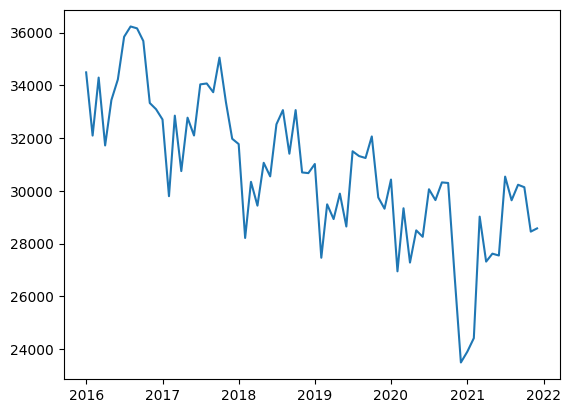

In [107]:
X_sum = X.groupby(["AMPAR"])["count"].sum()\
        .reset_index(name="sum")                #Creamos X_sum que contiene la suma de los nacimientos tanto varones como mujeres de todas las provincias agrupados por mes
plt.plot(X_sum['AMPAR'], X_sum['sum'])          #Representacion de X_sum
plt.show()

Para observar la estacionalidad representamos la evolución a lo largo de los meses por año.

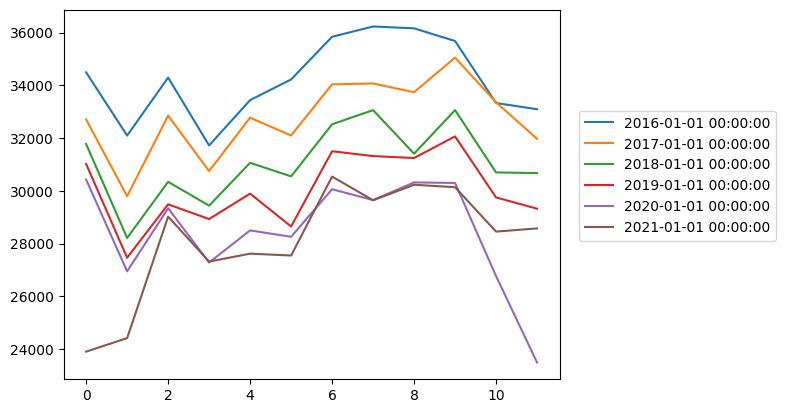

In [108]:
for i in range(0,X_sum.shape[0],12):
  if X_sum.shape[0]-i >=12:
    plt.plot(range(12),X_sum.iloc[i:i+12]["sum"])

plt.gca().legend(X_sum.iloc[::12]["AMPAR"], loc = "right", bbox_to_anchor=(0.45, 0.5, 1., .102))

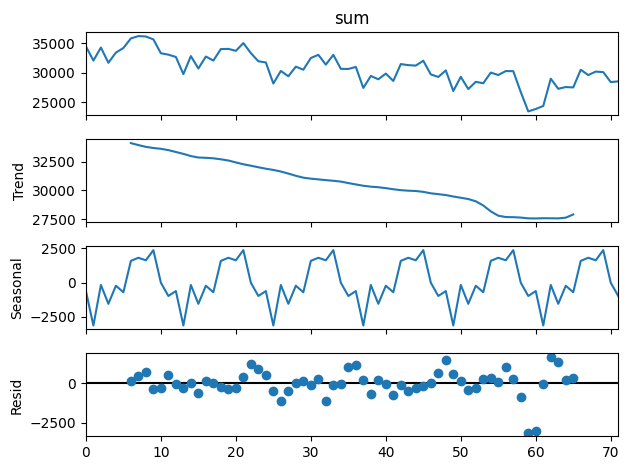

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(X_sum['sum'], model='additive', period = 12)

result.plot()
plt.show()

<Axes: >

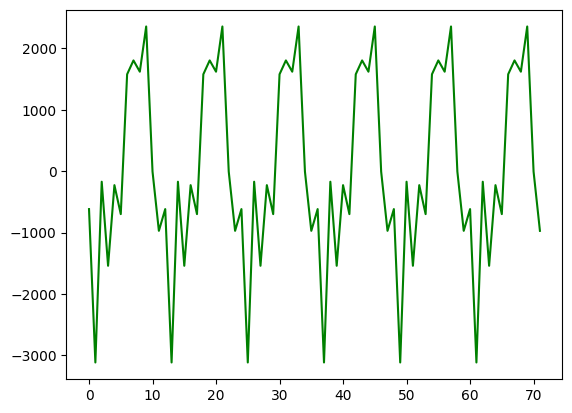

In [122]:
seasonality = result.seasonal
seasonality.plot(color='green')

# Entrenamiento y evaluación de Modelos

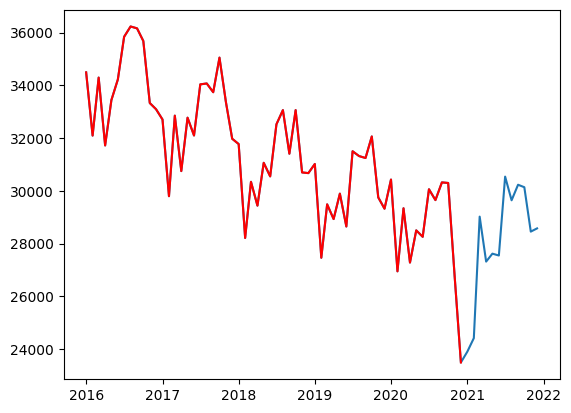

In [80]:
X_p = X_sum[X_sum['AMPAR'].dt.year < 2021]
T_missing = range(60, X_sum.shape[0])

plt.plot(X_sum['AMPAR'], X_sum['sum'])
plt.plot(X_p['AMPAR'], X_p['sum'], color='red')
plt.show()